In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

T-shirt/top


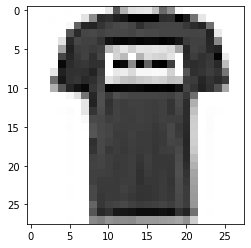

In [6]:
n=1
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [7]:
len(x_train)

60000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train = x_train.reshape(len(x_train),784)/255
x_test = x_test.reshape(len(x_test), 784)/255

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test_ = to_categorical(y_test,10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [12]:
model = Sequential()

In [13]:
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))

In [14]:
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 9,010
Trainable params: 9,010
Non-trainable params: 0
_________________________________________________________________


## Param = 輸入*權重 + 偏値

* $7850 = 784*10 + 10$

* $220 = 10*20 +20 $

* $630 = 20*30 + 30 $

In [17]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [27]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0283 - accuracy: 0.8097
Epoch 2/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0278 - accuracy: 0.8134
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0273 - accuracy: 0.8160
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0269 - accuracy: 0.8184
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0265 - accuracy: 0.8206
Epoch 6/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0262 - accuracy: 0.8226
Epoch 7/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0258 - accuracy: 0.8246
Epoch 8/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0256 - accuracy: 0.8262
Epoch 9/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0253 - accuracy: 0.8277
Epoch 10/20
60

In [19]:
def score(model, x_test, y_test):
    y_predict = model.predict_classes(x_test)
    l = y_predict - y_test
    l = list(l)
    trues= l.count(0)
    return trues/len(x_test)

In [24]:
y_predict = model.predict_classes(x_test)
def showpredict(n):
    print('model預測：',class_names[y_predict[n]])
    print('答案是：',class_names[y_test[n]])
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

In [28]:
print('正確率：',score(model,x_test,y_test))

正確率： 0.8267


In [22]:
from ipywidgets import interact_manual

In [29]:
interact_manual(showpredict, n=(0,len(x_test)-1))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.showpredict(n)>